In [31]:
import numpy as np
import matplotlib.pyplot as plt



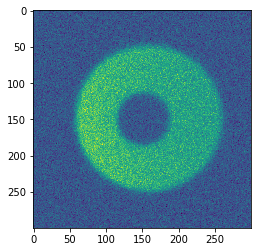

In [42]:
donut2=np.load('../data/flip_donut_data5.npz')
donut3=np.load('../data/donut_data1.npz')
plt.imshow(donut2['image'])

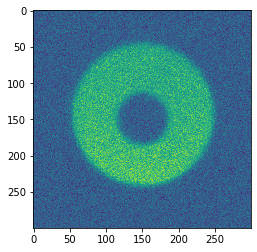

In [ ]:
plt.imshow(donut2['image'])

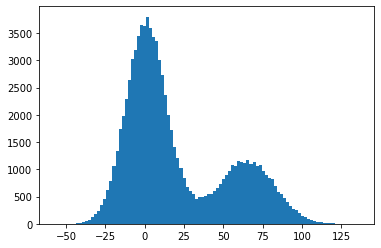

In [ ]:
plt.hist(donut2['image'].flatten(), bins=100);

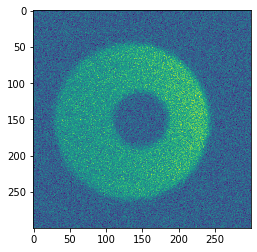

In [ ]:
plt.imshow(donut3['image'])